In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

In [2]:
#buat kolom order_month dan gmv
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') &
						 (dataset['order_month']>='2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   
6   1711399  2019-11-04        16791    Jakarta Barat  DKI Jakarta      P0860   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
4  BRAND_R         2     4475000     2019-10  8950000  
6  BRAND_C         1     1465000     2019-11  1465000  


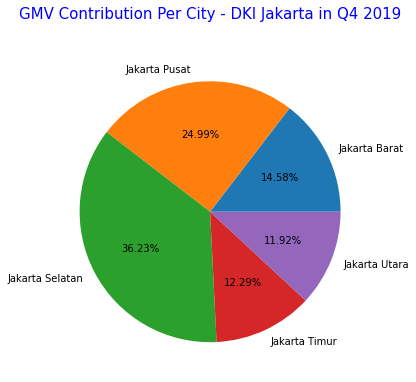

In [3]:
#buat pie chart
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'],labels=gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019',loc='center',pad=30,fontsize=15,color='blue')
plt.show()

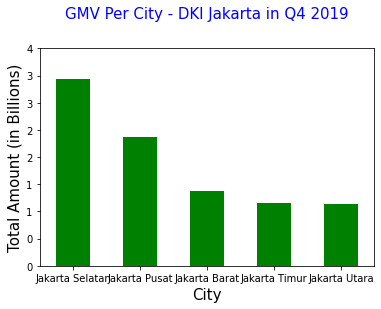

In [4]:
#buat bar chart
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar',color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019',loc='center',pad=30,fontsize=15,color='blue')
plt.xlabel('City',fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.ylim(ymin=0)
labels,locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

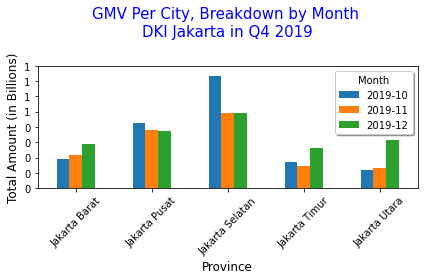

In [5]:
#multi bar chart
dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month \nDKI Jakarta in Q4 2019',
		  loc='center',pad=30,fontsize=15,color='blue')
plt.xlabel('Province',fontsize=12)
plt.ylabel('Total Amount (in Billions)',fontsize=12)
plt.legend(bbox_to_anchor=(1,1),shadow=True,title='Month')
plt.ylim(ymin=0)
labels,locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

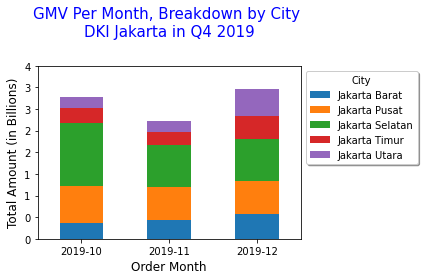

In [6]:
#stacked chart
dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True)
plt.title('GMV Per Month, Breakdown by City \nDKI Jakarta in Q4 2019',
		  loc='center',pad=30,fontsize=15,color='blue')
plt.xlabel('Order Month',fontsize=12)
plt.ylabel('Total Amount (in Billions)',fontsize=12)
plt.legend(bbox_to_anchor=(1,1),shadow=True,ncol=1,title='City')
plt.ylim(ymin=0)
labels,locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
#aggregate data customer
data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders',ascending=False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

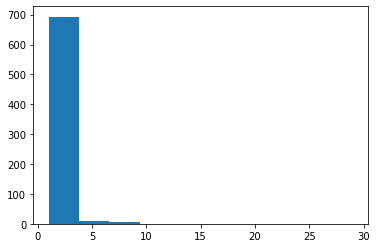

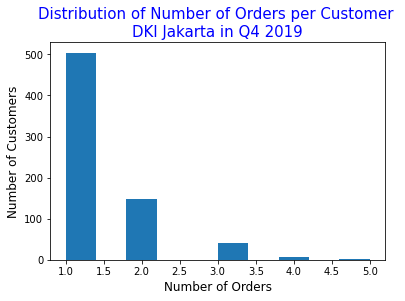

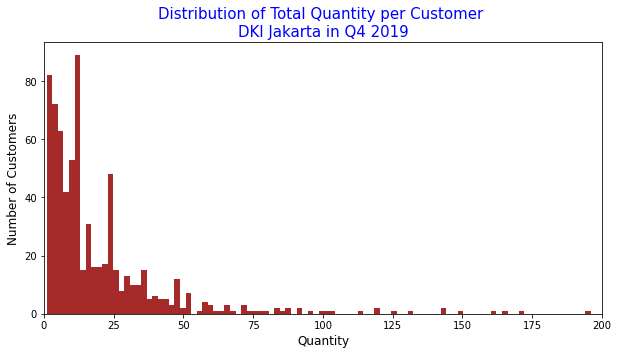

In [8]:
plt.clf()
	# histogram 1
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()
	# histogram 2
plt.figure()
plt.hist(data_per_customer['orders'],range=(1,5))
plt.title('Distribution of Number of Orders per Customer \nDKI Jakarta in Q4 2019',
		  fontsize=15,color='blue')
plt.xlabel('Number of Orders',fontsize=12)
plt.ylabel('Number of Customers',fontsize=12)
plt.show()
	# histogram 3
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'],bins=100,range=(1,200),color='brown')
plt.title('Distribution of Total Quantity per Customer \nDKI Jakarta in Q4 2019',fontsize=15,color='blue')
plt.xlabel('Quantity',fontsize=12)
plt.ylabel('Number of Customers',fontsize=12)
plt.xlim(xmin=0,xmax=200)
plt.show()

<Figure size 432x288 with 0 Axes>

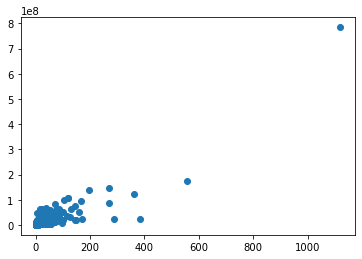

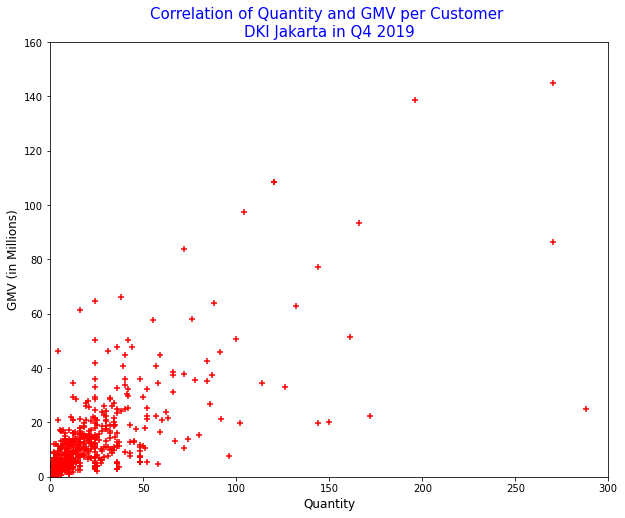

In [9]:
#scatterplot
plt.clf()
	# scatterplot 1
plt.figure()
plt.scatter(data_per_customer['quantity'],data_per_customer['gmv'])
plt.show()
	# scatterplot 2 (perbaikan scatterplot 1)
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'],data_per_customer['gmv'],marker='+',color='red')
plt.title('Correlation of Quantity and GMV per Customer \nDKI Jakarta in Q4 2019',fontsize=15,color='blue')
plt.xlabel('Quantity',fontsize=12)
plt.ylabel('GMV (in Millions)',fontsize=12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=150000000)
labels,locations = plt.yticks()
plt.yticks(labels,(labels/1000000).astype(int))
plt.show()